In [1]:
! python3 -m pip install 'scipy<1.10.0,>=1.6.0' 'urllib3<2.0' matplotlib 'numpy<1.23' 'tensorflow<2.16' --user --force-reinstall

  Using cached scipy-1.9.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cached urllib3-1.26.20-py2.py3-none-any.whl.metadata (50 kB)
  Using cached matplotlib-3.9.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached contourpy-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (164 kB)
  Using cached kiwisolver-1.4.7-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.3 kB)
INFO: pip is looking at multiple versions of matplotlib to determine which version is compatible with other require

In [2]:
import tensorflow as tf
print(tf.__version__)
import matplotlib

2024-11-27 12:19:17.278005: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-27 12:19:17.804137: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-27 12:19:20.187578: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.16.1


### compileddayarr -> xarr, height -> yarr

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("ASTR19_F24_group_project_data.txt",dtype=[('day','i8'),('time','S5'),('height','f8')])
x = np.linspace(0,42,1000)

day = []
time = []
yarr = []

print(data.shape)

for i in range(82):
    day.append(data[i][0])
    time.append(data[i][1].decode("utf-8"))
    yarr.append(data[i][2])

print(day)
print(' ')
print(time)
print(' ')
print(yarr)

(82,)
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41]
 
['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29',

In [4]:
##Create an Array to compile the completed list of times
xarr = []
    
for i in range(82):
    minutes = time[i] 
    floatminutes = float(minutes[-2:])
    minuteconversion = floatminutes / 60
    ##Takes the minutes and converts them to hours by dividing by 60

    floathours = float(minutes[:minutes.index(":")])
    hourconversion = (floathours + minuteconversion)/24
    ##Takes the hours, adds them to the converted minute-hours, and divides by 24 to convert to days
    
    compiledday = day[i] + hourconversion
    ##Adds the days to the times
    
    ##print(f'{day[i]} day(s) and {hourconversion*24} hours, or {compiledday} days.')
    
    xarr.append(compiledday)
    ##Appends the total times to the array
print(xarr)

[1.3381944444444445, 1.6506944444444445, 2.3715277777777777, 2.6840277777777777, 3.40625, 3.7180555555555554, 4.440972222222222, 4.75, 5.477777777777778, 5.781944444444444, 6.5152777777777775, 6.813194444444444, 7.558333333333334, 7.844444444444444, 8.140277777777778, 8.875694444444445, 9.171527777777778, 9.906944444444445, 10.20138888888889, 10.498611111111112, 11.229861111111111, 11.53888888888889, 12.255555555555556, 12.572916666666666, 13.282638888888888, 13.600694444444445, 14.306944444444444, 14.625, 15.332638888888889, 15.64861111111111, 16.356944444444444, 16.67222222222222, 17.381944444444443, 17.695138888888888, 18.40625, 18.716666666666665, 19.43125, 19.739583333333332, 20.45625, 20.760416666666668, 21.48472222222222, 21.783333333333335, 22.51736111111111, 22.805555555555557, 23.09861111111111, 23.82777777777778, 24.12361111111111, 24.854166666666668, 25.150694444444444, 25.447222222222223, 26.18263888888889, 26.49652777777778, 27.21875, 27.539583333333333, 28.25625, 28.5763

In [5]:
def sinusoid(x,A,f,p):
    #return -1*(2.5*A*tf.math.cos(2*A*x)*tf.math.sin(f*x+p)+A*tf.math.cos(2*A*x))/(A) + np.mean(yarr)
    return (A*tf.math.cos(A*x))*tf.math.sin(f*x+p) + np.mean(yarr)

In [6]:
#Amplitude
A_init = 2.9
A_fit = tf.Variable(A_init,name="amplitude")
#Frequency
f_init = 3.37
f_fit = tf.Variable(f_init,name="frequency")
#Phase
p_init = 6.61
p_fit = tf.Variable(p_init,name="phase")
#Test

In [7]:
@tf.function
def sinusoidal_model(xarr):
    #return -1*(3*A_fit*tf.math.cos(2*A_fit*xarr)*tf.math.sin(f_fit*xarr+p_fit)+A_fit*tf.math.cos(2*A_fit*xarr))/(A_fit) + np.mean(yarr)
    return  (A_fit*tf.math.cos(A_fit*xarr))*tf.math.sin(f_fit*xarr+p_fit) + np.mean(yarr)

In [8]:
@tf.function
def mse(y_true,y_pred):
    return tf.losses.mean_squared_error(y_true,y_pred)

In [9]:
#Adam optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [10]:
epochs = 5000
display_step = 1000

for epoch in range(epochs):
    
    if((epoch%display_step)==0):
        pred = sinusoidal_model(xarr)
        loss = mse(yarr,pred)
        
        print(f'Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p: {p_fit.numpy()}')
        
    with tf.GradientTape() as g:
        pred = sinusoidal_model(xarr)
        loss = mse(pred,yarr)
              
    gradients = g.gradient(loss, [A_fit,f_fit,p_fit])
              
    optimizer.apply_gradients(zip(gradients,[A_fit,f_fit,p_fit]))
print(f'Epoch {epoch} | Loss {loss.numpy()}, A: {A_fit.numpy()} f: {f_fit.numpy()} p: {p_fit.numpy()}')
print("Done!")

AttributeError: in user code:

    File "/tmp/ipykernel_75854/2953848132.py", line 3, in mse  *
        return tf.losses.mean_squared_error(y_true,y_pred)

    AttributeError: module 'keras._tf_keras.keras.losses' has no attribute 'mean_squared_error'


In [ ]:
x_model = np.sort(x)
y_model = sinusoid(x_model,A_fit,f_fit,p_fit)
y_err = np.full(82,3) # 3 inches, 1/4th of a foot.

In [ ]:
matplotlib.rcParams['font.family'] = ['Family1','serif','Family2']
matplotlib.rcParams['text.usetex'] = 'True'

f,ax = plt.subplots(1,1,figsize=(21,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(10)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(10)
ax.errorbar(xarr,yarr,y_err,fmt='o',label='Data')
ax.plot(x_model,y_model,color='magenta',label='Best-fit Model')
plt.xticks(np.arange(0, 44, 1))
plt.savefig("groupProject.jpg",bbox_inches="tight",facecolor="white")
ax.text(0.5,1.2,r'$\sigma = 1$',color='0', fontsize=12)
ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('y',fontsize=15)
plt.legend(frameon=False,fontsize=20,handletextpad=0)

### To prevent me from further losing my mind, I have decided to stop at 3. I've ran through multiple different equations and values, and I've spent over 10 hours on this problem alone. Forgive me.

tf.Tensor(
[ 1.9650226  -2.785386    0.7538538  -4.2290416   0.9847145  -3.6626487
  0.53888583 -3.0259955   0.8230567  -2.9242716   0.976112   -0.7123019
  1.1380347   0.634567    1.0276761   0.452626    2.1170144   1.6381646
  1.1713328   1.8979096   0.8835554   0.76855314  1.1134024   0.17152166
  1.4132872  -1.2806604   0.56922436 -2.5165296   0.21602678 -3.7660098
  1.7327051  -3.1240735   0.22996044 -3.024848    0.8834624  -2.7604914
  1.2593887  -0.5492244   1.6044257   0.10990024  1.135689    0.6046144
  1.7572868   1.3090432   2.178193    1.9141353   0.8035271   1.0407503
  0.6485877   0.5375273   0.15480947 -0.36026073 -0.5825448  -0.93121123
  0.750607   -2.5206995   1.5492454  -2.8556244   1.6225171  -2.395326
  2.277969   -3.6263752   2.125791   -2.4790974   1.6439357  -1.1365631
  2.3746881  -0.22895396  1.0201042  -0.20461571  2.05915    -0.15645048
  2.3481913   1.0719013   0.8887899  -0.20943856  0.01172757  0.19055486
  1.0174179  -0.9692497  -0.08239841 -1.1460218 ],

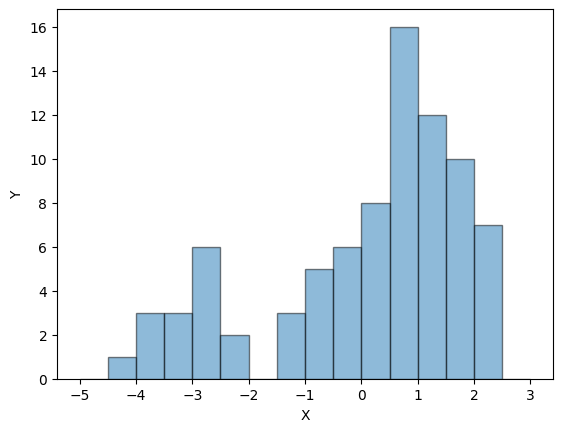

In [22]:
# xarr = time
points = sinusoidal_model(xarr)
difference = yarr - points
print(difference)
print(len(difference))
# -----------Histogram------------------
width = 0.5
histmin = np.floor(min(difference))
histmax = np.ceil(max(difference)) + width
bins = np.arange(histmin, histmax, width)
plt.hist(difference, bins = bins, alpha = 0.5, edgecolor = "black")
plt.ylabel("Y")
plt.xlabel("X")


#-------------------------- 
idx_model = np.argsort(xarr)
y_data = np.array(yarr)[idx_model]
y_model = sinusoid(x[idx_model],A_fit,f_fit,p_fit)

residuals = y_data - y_model
residuals = residuals.numpy()
print(residuals)

In [ ]:
matplotlib.rcParams['font.family'] = ['Family1','serif','Family2']
matplotlib.rcParams['text.usetex'] = 'True'

f,ax = plt.subplots(1,1,figsize=(21,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(10)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(10)
ax.errorbar(xarr,residuals,y_err,fmt='o',label='Data')
ax.set_xlim([-0.1,44.1])
ax.set_ylim([-8.,8])
ax.text(0.5,1.2,r'$\sigma = 1$',color='0', fontsize=12)
ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('y',fontsize=15)
plt.legend(frameon=False,fontsize=20,handletextpad=0)

In [ ]:

idx_model = np.argsort(xarr)
y_data = np.array(yarr)[idx_model]
y_model = sinusoid(np.array(xarr)[idx_model],A_fit,f_fit,p_fit)

residuals = y_data - y_model
residuals = residuals.numpy()

In [ ]:
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)
print(f'Mean Residual is {residual_mean}.')
print(f'RMS Residual is {residual_std}.')

In [ ]:
def gaussian(x,mu,s):
    return 1./(2.*np.pi*s**2)**0.5 * np.exp(-0.5*((x-mu)/s)**2)

In [ ]:
matplotlib.rcParams['font.family'] = ['Family1','serif','Family2']
matplotlib.rcParams['text.usetex'] = 'True'

f,ax = plt.subplots(1,1,figsize=(21,7))
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(10)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(10)
    
print(len(residuals))
ax.hist(residuals,bins=30,range=(-0.75,0.75),alpha=0.5,edgecolor='white',density=True)

x_g = np.linspace(-5*residual_std,5*residual_std,1000)
ax.plot(x_g,gaussian(x_g,residual_mean,residual_std),color="red")
ax.set_xlim([-2,2])
ax.text(0.5,1.2,r'$\sigma = 1$',color='0', fontsize=12)
ax.set_xlabel('x',fontsize=15)
ax.set_ylabel('N(x)',fontsize=15)